# Tudo

In [2]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/processed/mandante_ano.csv')

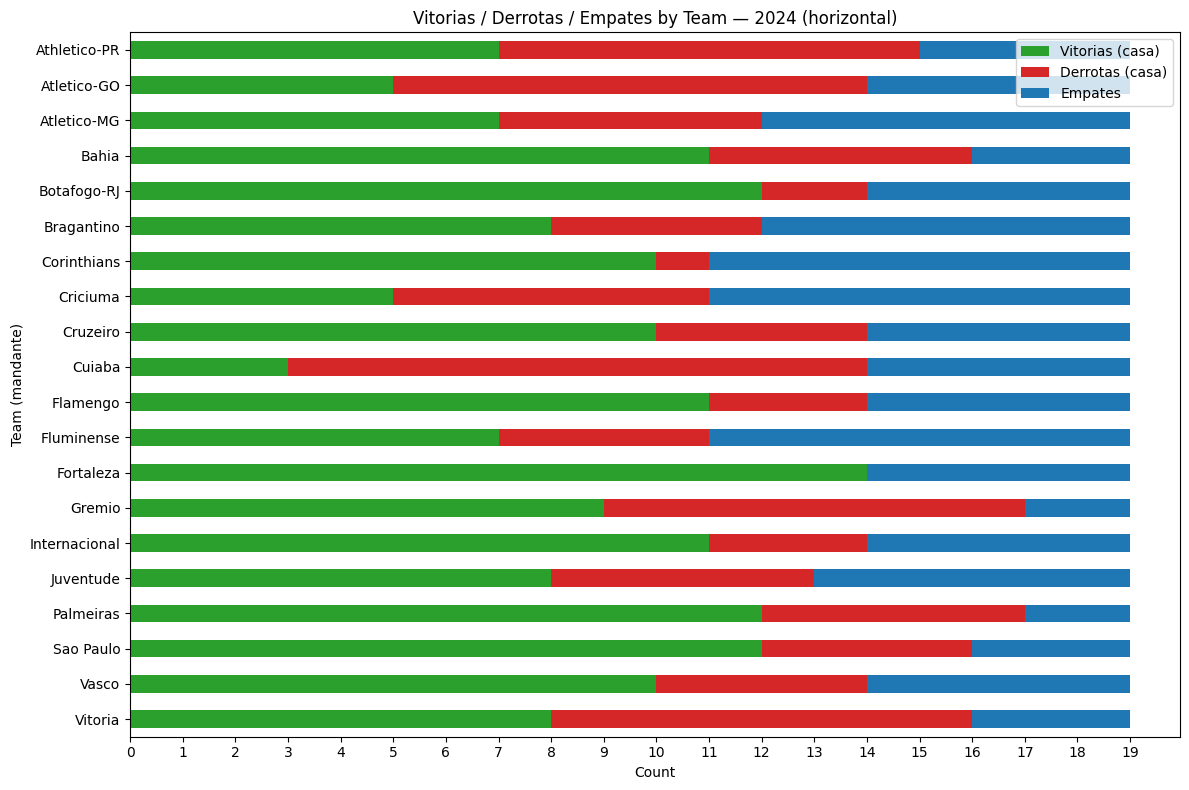

In [5]:
# aggregate for 2024 and plot horizontal (sideways) stacked bar chart
agg = df[df['ano'] == 2024].groupby('mandante')[['vitorias_casa', 'derrotas_casa', 'empates']].sum()

# sort by total ascending so that after inverting y-axis the largest totals appear at the top
data = agg.loc[agg.sum(axis=1).sort_values(ascending=True).index]

ax = data.plot(kind='barh', stacked=True, figsize=(12, 8),
               color=['#2ca02c', '#d62728', '#1f77b4'])
ax.set_ylabel('Team (mandante)')
ax.set_xlabel('Count')
ax.set_title('Vitorias / Derrotas / Empates by Team — 2024 (horizontal)')
ax.legend(['Vitorias (casa)', 'Derrotas (casa)', 'Empates'], loc='best')

# show integer ticks for x axis and include every integer tick from 0 to the max total
max_total = int(data.sum(axis=1).max())
ax.set_xticks(range(0, max_total + 1))

ax.invert_yaxis()  # ensure highest totals are shown at the top
plt.tight_layout()
plt.show()


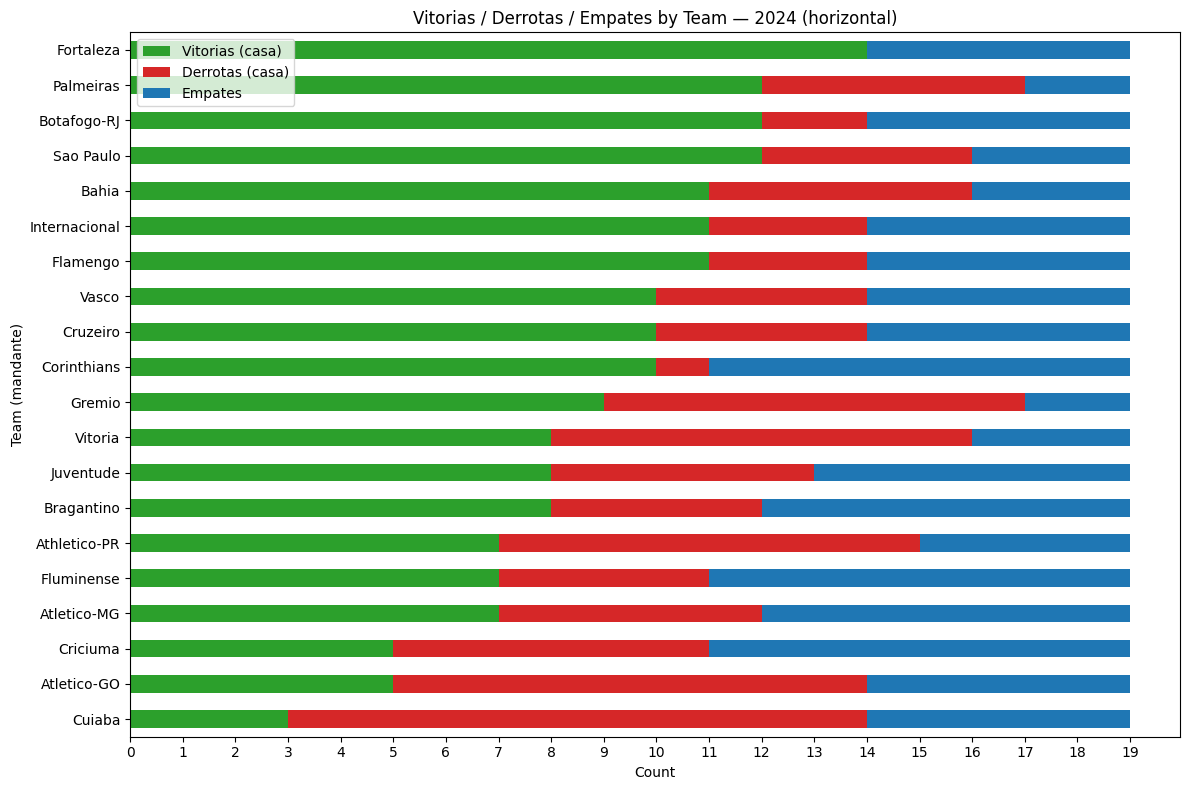

In [6]:
agg = df[df['ano'] == 2024].groupby('mandante')[['vitorias_casa', 'derrotas_casa', 'empates']].sum()


# sort by vitorias_casa and plot horizontal stacked bars
data = agg.sort_values('vitorias_casa')[::-1]  # ascending so largest ends up at top after invert

ax = data.plot(kind='barh', stacked=True, figsize=(12, 8),
               color=['#2ca02c', '#d62728', '#1f77b4'])
ax.set_ylabel('Team (mandante)')
ax.set_xlabel('Count')
ax.set_title('Vitorias / Derrotas / Empates by Team — 2024 (horizontal)')
ax.legend(['Vitorias (casa)', 'Derrotas (casa)', 'Empates'], loc='best')

# show integer ticks for x axis and include every integer tick from 0 to the max total
max_total = int(data.sum(axis=1).max())
ax.set_xticks(range(0, max_total + 1))

ax.invert_yaxis()  # ensure highest totals are shown at the top
plt.tight_layout()
plt.show()


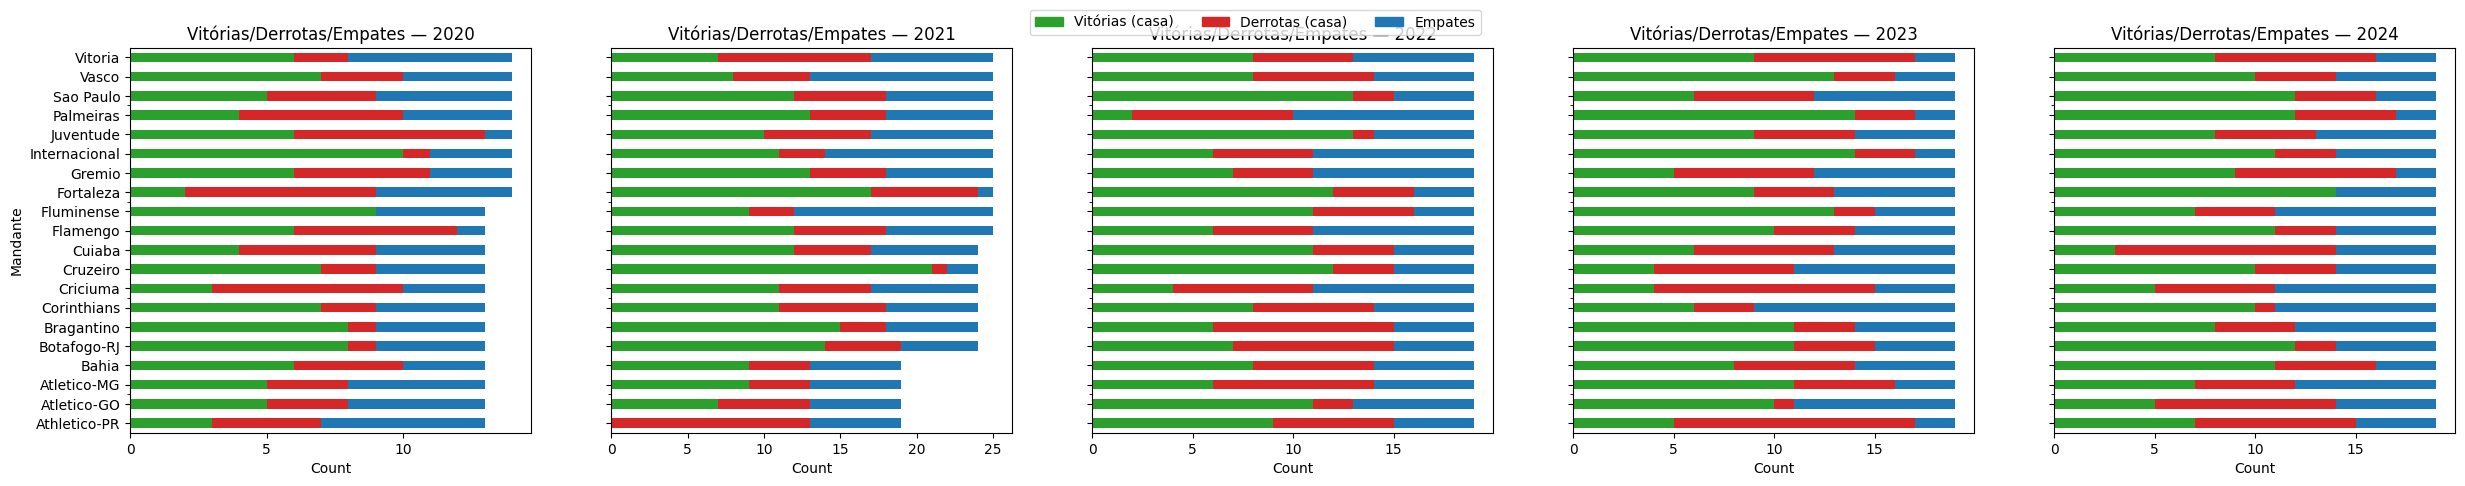

In [15]:
# ...existing code...
import math

years = [2020, 2021, 2022, 2023, 2024]
cols = 5
rows = math.ceil(len(years) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5), sharey=True)
axes = axes.ravel()

for ax, year in zip(axes, years):
    data = (
        df[df['ano'] == year]
        .groupby('mandante')[['vitorias_casa', 'derrotas_casa', 'empates']]
        .sum()
    )
    data = data.loc[data.sum(axis=1).sort_values().index[::-1]]

    data.plot(
        kind='barh',
        stacked=True,
        ax=ax,
        color=['#2ca02c', '#d62728', '#1f77b4'],
        legend=False
    )

    max_total = int(data.sum(axis=1).max())
    ax.set_xticks(range(0, max_total + 1, 5))
    ax.set_xlabel('Count')
    ax.set_ylabel('Mandante')
    ax.set_title(f'Vitórias/Derrotas/Empates — {year}')
    ax.invert_yaxis()
for ax in axes[len(years):]:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.axis('off')

handles = [
    plt.Rectangle((0, 0), 1, 1, color=c)
    for c in ['#2ca02c', '#d62728', '#1f77b4']
]
fig.legend(handles, ['Vitórias (casa)', 'Derrotas (casa)', 'Empates'],
           loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.97))

#plt.tight_layout()
plt.show()
# ...existing code...